<a href="https://colab.research.google.com/github/MrAsifKhan/Deep-Learning/blob/main/June7th_Exam_v2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#by Asif Khan Pattan :)
    
import tensorflow as tf 
import random
from cv2 import GaussianBlur
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def getDataset():
  (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
  normalize = lambda x: x/x.max()
  x_train = normalize(x_train)
  x_test = normalize(x_test)
  createBlurred = lambda arr: np.array([GaussianBlur(x, (5,5), ((random.random()*3)+1)) + (0.02*np.random.normal(0,1, (32, 32, 3))) for x in arr])
  return (createBlurred(x_train), x_train), (createBlurred(x_test), x_test)




In [2]:
(x_train, y_train), (x_test, y_test) = getDataset()


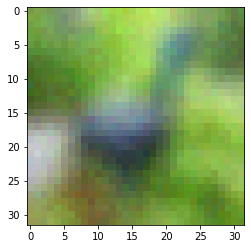

In [3]:
#visualization of blurred image
from matplotlib import pyplot

imga=x_train
imgb=imga[6]
pyplot.imshow(imgb)

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import UpSampling2D
from tensorflow.keras import  regularizers

print(x_train.shape[1:])
#model creationn
model = Sequential()

#encode
model.add(layers.Conv2D(256, (3,3), strides = 1,activation= 'relu',padding = 'same', input_shape = x_train.shape[1:]))

model.add(layers.Conv2D(128, (3,3), strides = 1, activation= 'relu'))

model.add(layers.Conv2D(64, (3,3), strides = 1,activation= 'relu'))

#latent
model.add(layers.Conv2D(32, (3,3), strides = 1,activation= 'relu'))
#decode


model.add(layers.Conv2DTranspose(64, (3,3), strides = 1,activation= 'relu'))
model.add(layers.Conv2DTranspose(128, (3,3), strides = 1,activation= 'relu'))
model.add(layers.Conv2DTranspose(256, (3,3), strides = 1,activation= 'relu'))
model.add(layers.Conv2DTranspose(3, (1, 1), strides = 1,activation='sigmoid', padding = 'same'))

(32, 32, 3)


In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 28, 28, 64)       18496     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 30, 30, 128)      73856     
 ranspose)                                              

In [7]:


print(x_train.shape)
print(x_test.shape)

history=model.fit(x_train, y_train,
                epochs=15,
                batch_size=2,
                shuffle=True,
                validation_data=(x_test, y_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Epoch 1/15
6250/6250 [==============================] - 64s 10ms/step - loss: 0.0045 - accuracy: 0.7858 - val_loss: 0.0034 - val_accuracy: 0.8085
Epoch 2/15
6250/6250 [==============================] - 61s 10ms/step - loss: 0.0033 - accuracy: 0.8233 - val_loss: 0.0032 - val_accuracy: 0.8311
Epoch 3/15
6250/6250 [==============================] - 61s 10ms/step - loss: 0.0031 - accuracy: 0.8312 - val_loss: 0.0030 - val_accuracy: 0.8276
Epoch 4/15
6250/6250 [==============================] - 61s 10ms/step - loss: 0.0030 - accuracy: 0.8357 - val_loss: 0.0030 - val_accuracy: 0.8342
Epoch 5/15
6250/6250 [==============================] - 62s 10ms/step - loss: 0.0029 - accuracy: 0.8386 - val_loss: 0.0029 - val_accuracy: 0.8189
Epoch 6/15
6250/6250 [==============================] - 61s 10ms/step - loss: 0.0029 - accuracy: 0.8399 - val_loss: 0.0028 - val_accuracy: 0.8325
Epoch 7/15
6250/6250 [==============================] - 62s 10ms/step - loss: 0.0028 -

In [8]:
pred = model.predict(x_test)

In [9]:
print(pred.shape)

(10000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(10000, 32, 32, 3)
Test Images with Noise


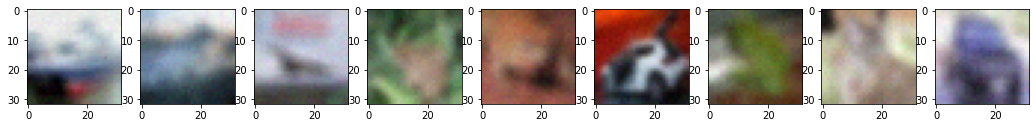

original image


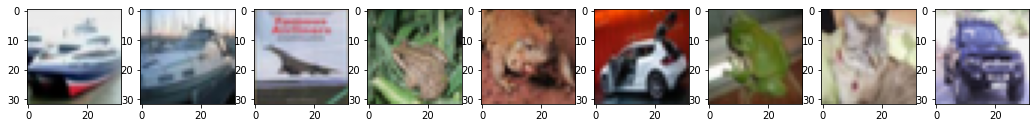

Reconstruction of Noisy Test Images


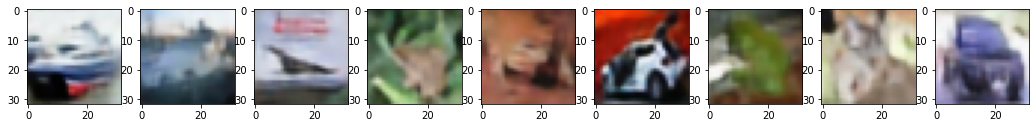

In [10]:
import numpy
import matplotlib.pyplot as plt
print(x_test.shape)



plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(1,10,1):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i,:,:,:])
plt.show()    
plt.figure(figsize=(20, 4))
print("original image")
for i in range(1,10,1):
    plt.subplot(1, 10, i+1)
    plt.imshow(y_test[i,:,:,:])
plt.show()  
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(1,10,1):
    plt.subplot(1, 10, i+1)
    plt.imshow(pred[i,:,:,:])  
plt.show()

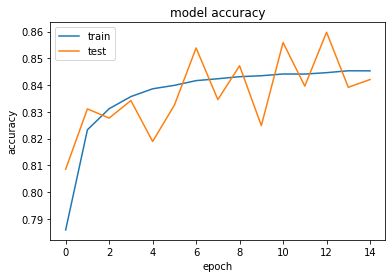

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

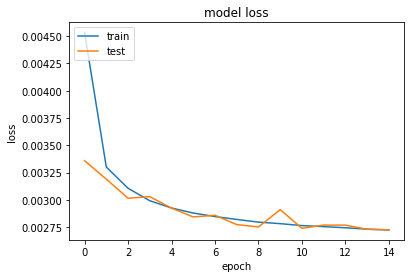

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()